# Data Exploration and Clustering

## Part One: Data Exploration
Here we will explore the data to gain an understanding of the range of values and typical values for each feature. We will also look at the correlation between features, specifically popularity and the other features, to get an understanding of what factors might have the greatest influence in our models.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [2]:
df = pd.read_csv("songs.csv", index_col = 0)

In [3]:
df.head()
y_true = df['artist'].to_numpy()

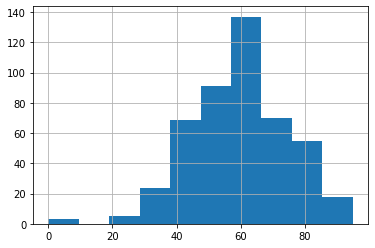

In [4]:
df['popularity'].hist()

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
length,472.0,224094.608051,49207.747575,36935.000000,195746.500000,220839.500000,247071.000000,403887.000
popularity,472.0,59.495763,15.204200,0.000000,49.000000,61.000000,68.250000,95.000
danceability,472.0,0.624655,0.144392,0.193000,0.530000,0.627000,0.736000,0.956
acousticness,472.0,0.287461,0.292826,0.000191,0.038100,0.170000,0.489000,0.971
energy,472.0,0.600154,0.177338,0.021800,0.482000,0.618000,0.739500,0.959
instrumentalness,472.0,0.007419,0.054021,0.000000,0.000000,0.000002,0.000078,0.880
liveness,472.0,0.173761,0.127254,0.033500,0.096425,0.122000,0.196000,0.783
loudness,472.0,-7.141326,2.736630,-31.160000,-8.522500,-6.702000,-5.371000,-2.098
speechiness,472.0,0.099857,0.111269,0.023100,0.035150,0.053250,0.113000,0.912
valence,472.0,0.440930,0.224415,0.036100,0.253500,0.429500,0.596250,0.961


In [6]:
df.loc[df['popularity'] == 0]

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
376,I Know Places - Voice Memo,1989 (Deluxe),Taylor Swift,2014-01-01,216333,0,0.592,0.829,0.128,0.0,0.527,-17.932,0.589,0.150,78.828
377,I Wish You Would - Voice Memo,1989 (Deluxe),Taylor Swift,2014-01-01,107133,0,0.781,0.717,0.357,0.0,0.185,-16.394,0.912,0.645,118.317
378,Blank Space - Voice Memo,1989 (Deluxe),Taylor Swift,2014-01-01,131186,0,0.675,0.801,0.234,0.0,0.657,-15.064,0.721,0.578,127.296


In [7]:
len(df.loc[df['instrumentalness'] == 0])

223

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472 entries, 0 to 471
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              472 non-null    object 
 1   album             472 non-null    object 
 2   artist            472 non-null    object 
 3   release_date      472 non-null    object 
 4   length            472 non-null    int64  
 5   popularity        472 non-null    int64  
 6   danceability      472 non-null    float64
 7   acousticness      472 non-null    float64
 8   energy            472 non-null    float64
 9   instrumentalness  472 non-null    float64
 10  liveness          472 non-null    float64
 11  loudness          472 non-null    float64
 12  speechiness       472 non-null    float64
 13  valence           472 non-null    float64
 14  tempo             472 non-null    float64
dtypes: float64(9), int64(2), object(4)
memory usage: 59.0+ KB


In [9]:
corr_matrix = df.corr()
corr_matrix

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
length,1.000000,0.165329,-0.121437,-0.004046,-0.037827,-0.128277,-0.094777,0.018626,-0.080696,-0.245624,0.033103
popularity,0.165329,1.000000,0.205052,-0.074613,-0.057812,-0.040909,-0.093553,-0.006231,0.021714,-0.051833,0.032384
danceability,-0.121437,0.205052,1.000000,-0.272682,0.121114,-0.128301,-0.013851,0.146566,0.140866,0.413127,-0.158805
acousticness,-0.004046,-0.074613,-0.272682,1.000000,-0.642863,0.106958,-0.059410,-0.540681,0.001725,-0.189854,-0.109459
energy,-0.037827,-0.057812,0.121114,-0.642863,1.000000,-0.101871,0.096246,0.732812,0.027539,0.434424,0.139709
instrumentalness,-0.128277,-0.040909,-0.128301,0.106958,-0.101871,1.000000,-0.054967,-0.346486,-0.061296,-0.092228,0.009985
liveness,-0.094777,-0.093553,-0.013851,-0.059410,0.096246,-0.054967,1.000000,0.108741,0.137428,-0.008801,-0.018385
loudness,0.018626,-0.006231,0.146566,-0.540681,0.732812,-0.346486,0.108741,1.000000,-0.082416,0.339873,0.074945
speechiness,-0.080696,0.021714,0.140866,0.001725,0.027539,-0.061296,0.137428,-0.082416,1.000000,0.079254,0.024778
valence,-0.245624,-0.051833,0.413127,-0.189854,0.434424,-0.092228,-0.008801,0.339873,0.079254,1.000000,-0.048789


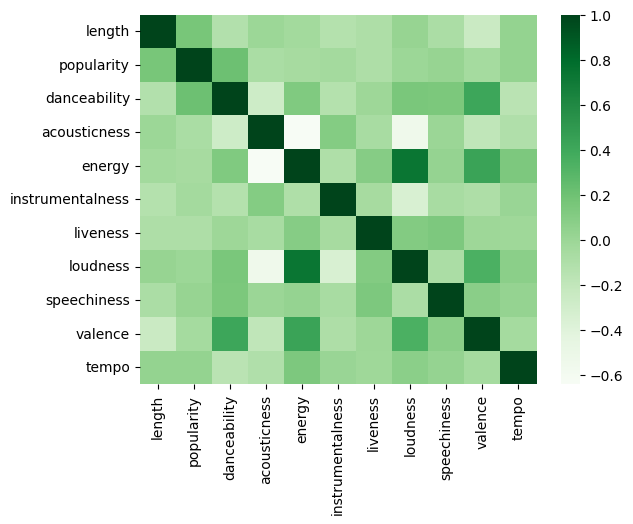

In [ ]:
sn.heatmap(corr_matrix, annot=False, cmap="Greens")
plt.show()

## Part Two: Kmeans Clustering

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [ ]:
DATA = df.iloc[:,4:].to_numpy()

In [ ]:
replace_dict = {
    "drake":0,
    "badbunny":1,
    "theweeknd":2,
    "edsheeran":3,
    "Taylor Swift":4
}

other_dict = {
    0:"drake",
    1:"badbunny",
    2:"theweeknd",
    3:"edsheeran",
    4:"Taylor Swift"
}

new_df = df
for key in replace_dict:
    new_df = new_df.replace(key,replace_dict[key])

new_df = new_df.drop(['release_date'], axis = 1)
ARTIST_DATA = new_df.to_numpy()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca = PCA(2)
data = ARTIST_DATA[:,3:]
print(data)
#Transform the data
data_pca = pca.fit_transform(data)
#Initialize the class object
kmeans = KMeans(n_clusters= 5)

#predict the labels of clusters.
label = kmeans.fit_predict(data_pca)

[[239360 88 0.561 ... 0.244 0.424 153.15]
 [170502 87 0.908 ... 0.323 0.225 131.016]
 [261544 86 0.841 ... 0.591 0.329 158.014]
 ...
 [189495 67 0.588 ... 0.0365 0.508 90.201]
 [208608 66 0.563 ... 0.0503 0.405 101.934]
 [242157 64 0.624 ... 0.0539 0.527 80.132]]


In [ ]:
pca_df = pd.DataFrame(data_pca, columns = ['A','B'])
category_df = pd.DataFrame(label, columns = ['category'])
combined_df = pca_df.join(category_df)

In [ ]:
combined_df.head()

,A,B,category
0,-15265.394052,33.755077,3
1,53592.606339,13.043202,2
2,-37449.394015,38.122444,4
3,71132.606242,24.461670,2
4,63273.606214,26.238755,2


In [ ]:
combined_df.head()

,A,B,category
0,-15265.394052,33.755077,3
1,53592.606339,13.043202,2
2,-37449.394015,38.122444,4
3,71132.606242,24.461670,2
4,63273.606214,26.238755,2


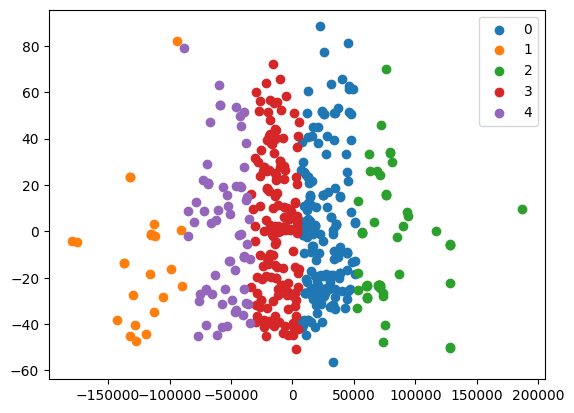

In [ ]:
unique_labels = np.unique(label)
for u in unique_labels:
    kmeans_df = combined_df.loc[combined_df['category'] == u]
    plt.scatter(kmeans_df['A'], kmeans_df['B'], label = u)
plt.legend()
plt.show()

In [ ]:
artist_df = pd.DataFrame(ARTIST_DATA[:,2], columns = ['artist'])
combined_df = pca_df.join(artist_df)
artists = ARTIST_DATA[:,2]
print(artists)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


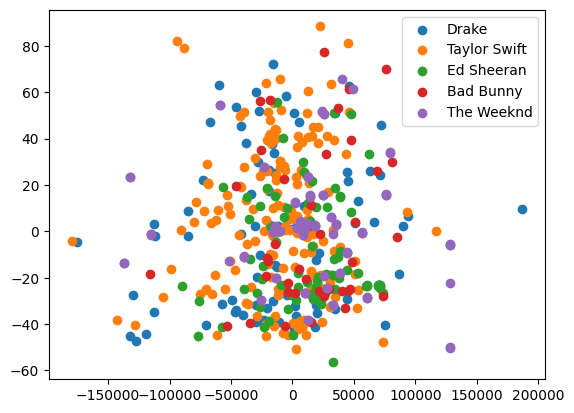

In [ ]:
drake = combined_df.loc[combined_df['artist'] == 0]
taylor = combined_df.loc[combined_df['artist'] == 4]
ed = combined_df.loc[combined_df['artist'] == 3]
badbunny = combined_df.loc[combined_df['artist'] == 1]
weeknd = combined_df.loc[combined_df['artist'] == 2]
plt.scatter(drake['A'], drake['B'], label = 'Drake')
plt.scatter(taylor['A'], taylor['B'], label = 'Taylor Swift')
plt.scatter(ed['A'], ed['B'], label = 'Ed Sheeran')
plt.scatter(badbunny['A'], badbunny['B'], label = 'Bad Bunny')
plt.scatter(weeknd['A'], weeknd['B'], label = 'The Weeknd')
plt.legend()
plt.show()

## Part Three: Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# linkage is the the function that performs the clustering
Z = linkage(DATA, 
            method='single', 
            metric='euclidean')

In [ ]:
# create string labels for the data samples, to show in the dendrogram
ticks = [f"{el}" for i, el in enumerate(y_true)]

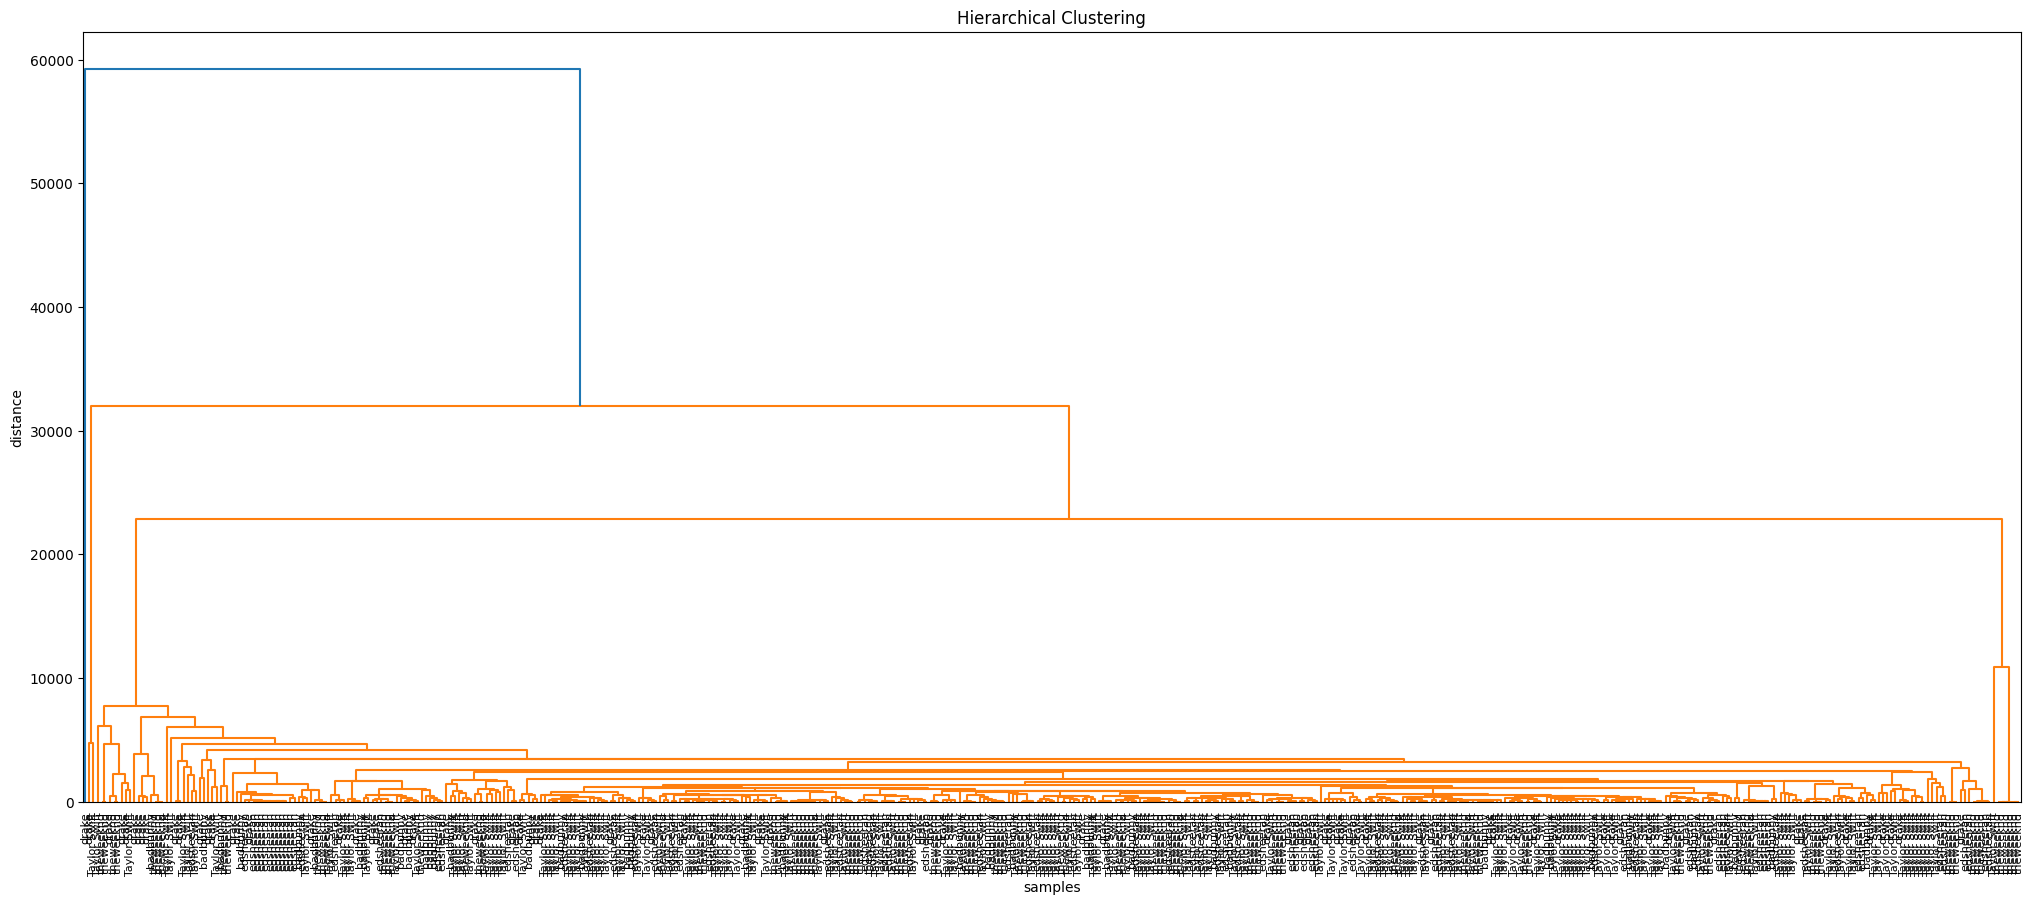

In [ ]:
def draw_dendogram(Z, ticks):
    """Helper function to draw a dendogram for testing purposes.
    """
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering')
    plt.xlabel('samples')
    plt.ylabel('distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
        labels = ticks
    )

    plt.show()
    
    
draw_dendogram(Z, ticks)    

In [ ]:
df

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,Rich Flex,Her Loss,drake,2022-11-04,239360,88,0.561,0.05030,0.520,0.000002,0.3550,-9.342,0.2440,0.424,153.150
1,Major Distribution,Her Loss,drake,2022-11-04,170502,87,0.908,0.01270,0.546,0.000000,0.0707,-10.491,0.3230,0.225,131.016
2,On BS,Her Loss,drake,2022-11-04,261544,86,0.841,0.02010,0.358,0.000000,0.3900,-8.368,0.5910,0.329,158.014
3,BackOutsideBoyz,Her Loss,drake,2022-11-04,152962,84,0.849,0.04070,0.433,0.000000,0.3880,-8.434,0.3160,0.395,142.110
4,Privileged Rappers,Her Loss,drake,2022-11-04,160821,84,0.934,0.00274,0.614,0.000000,0.1230,-7.384,0.1980,0.616,144.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,Mr. Perfectly Fine (Taylor’s Version) (From Th...,Fearless (Taylor's Version),Taylor Swift,2021-04-09,277591,74,0.660,0.16200,0.817,0.000000,0.0667,-6.269,0.0521,0.714,135.942
468,We Were Happy (Taylor’s Version) (From The Vault),Fearless (Taylor's Version),Taylor Swift,2021-04-09,244236,65,0.609,0.84900,0.373,0.000000,0.0779,-8.819,0.0263,0.130,106.007
469,That’s When (feat. Keith Urban) (Taylor’s Vers...,Fearless (Taylor's Version),Taylor Swift,2021-04-09,189495,67,0.588,0.22500,0.608,0.000000,0.0920,-7.062,0.0365,0.508,90.201
470,Don’t You (Taylor’s Version) (From The Vault),Fearless (Taylor's Version),Taylor Swift,2021-04-09,208608,66,0.563,0.51400,0.473,0.000012,0.1090,-11.548,0.0503,0.405,101.934


In [ ]:
sample_weeknd = df.loc[df['artist'] == 'theweeknd'].sample(n=5)
sample_bunny = sample_weeknd.append(df.loc[df['artist'] == 'badbunny'].sample(n=5))
sample_taylor = sample_bunny.append(df.loc[df['artist'] == 'Taylor Swift'].sample(n=5))
sample_ed = sample_taylor.append(df.loc[df['artist'] == 'edsheeran'].sample(n=5))
sample = sample_ed.append(df.loc[df['artist'] == 'drake'].sample(n=5))

len(sample)
y_true = sample['artist'].to_numpy()

C:\Users\hawai\AppData\Local\Temp\ipykernel_12128\3758427133.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_bunny = sample_weeknd.append(df.loc[df['artist'] == 'badbunny'].sample(n=5))
C:\Users\hawai\AppData\Local\Temp\ipykernel_12128\3758427133.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_taylor = sample_bunny.append(df.loc[df['artist'] == 'Taylor Swift'].sample(n=5))
C:\Users\hawai\AppData\Local\Temp\ipykernel_12128\3758427133.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_ed = sample_taylor.append(df.loc[df['artist'] == 'edsheeran'].sample(n=5))
C:\Users\hawai\AppData\Local\Temp\ipykernel_12128\3758427133.py:5: FutureWarning: The frame.append method is deprecated and will be removed 

In [ ]:
y_true

array(['theweeknd', 'theweeknd', 'theweeknd', 'theweeknd', 'theweeknd',
       'badbunny', 'badbunny', 'badbunny', 'badbunny', 'badbunny',
       'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift',
       'Taylor Swift', 'edsheeran', 'edsheeran', 'edsheeran', 'edsheeran',
       'edsheeran', 'drake', 'drake', 'drake', 'drake', 'drake'],
      dtype=object)

In [ ]:
sample_data = sample.iloc[:,4:].to_numpy()

In [ ]:
new_df = sample
for key in replace_dict:
    new_df = new_df.replace(key,replace_dict[key])

new_df = new_df.drop(['release_date'], axis = 1)
ARTIST_DATA = new_df.to_numpy()

In [ ]:
pca = PCA(2)
data = ARTIST_DATA[:,3:]
#Transform the data
data_pca = pca.fit_transform(data)
len(data_pca)

25

In [ ]:
# linkage is the the function that performs the clustering
Z = linkage(sample_data, 
            method='single', 
            metric='euclidean')

In [ ]:
ticks = [f"{el}" for i, el in enumerate(y_true)]
len(ticks)

25

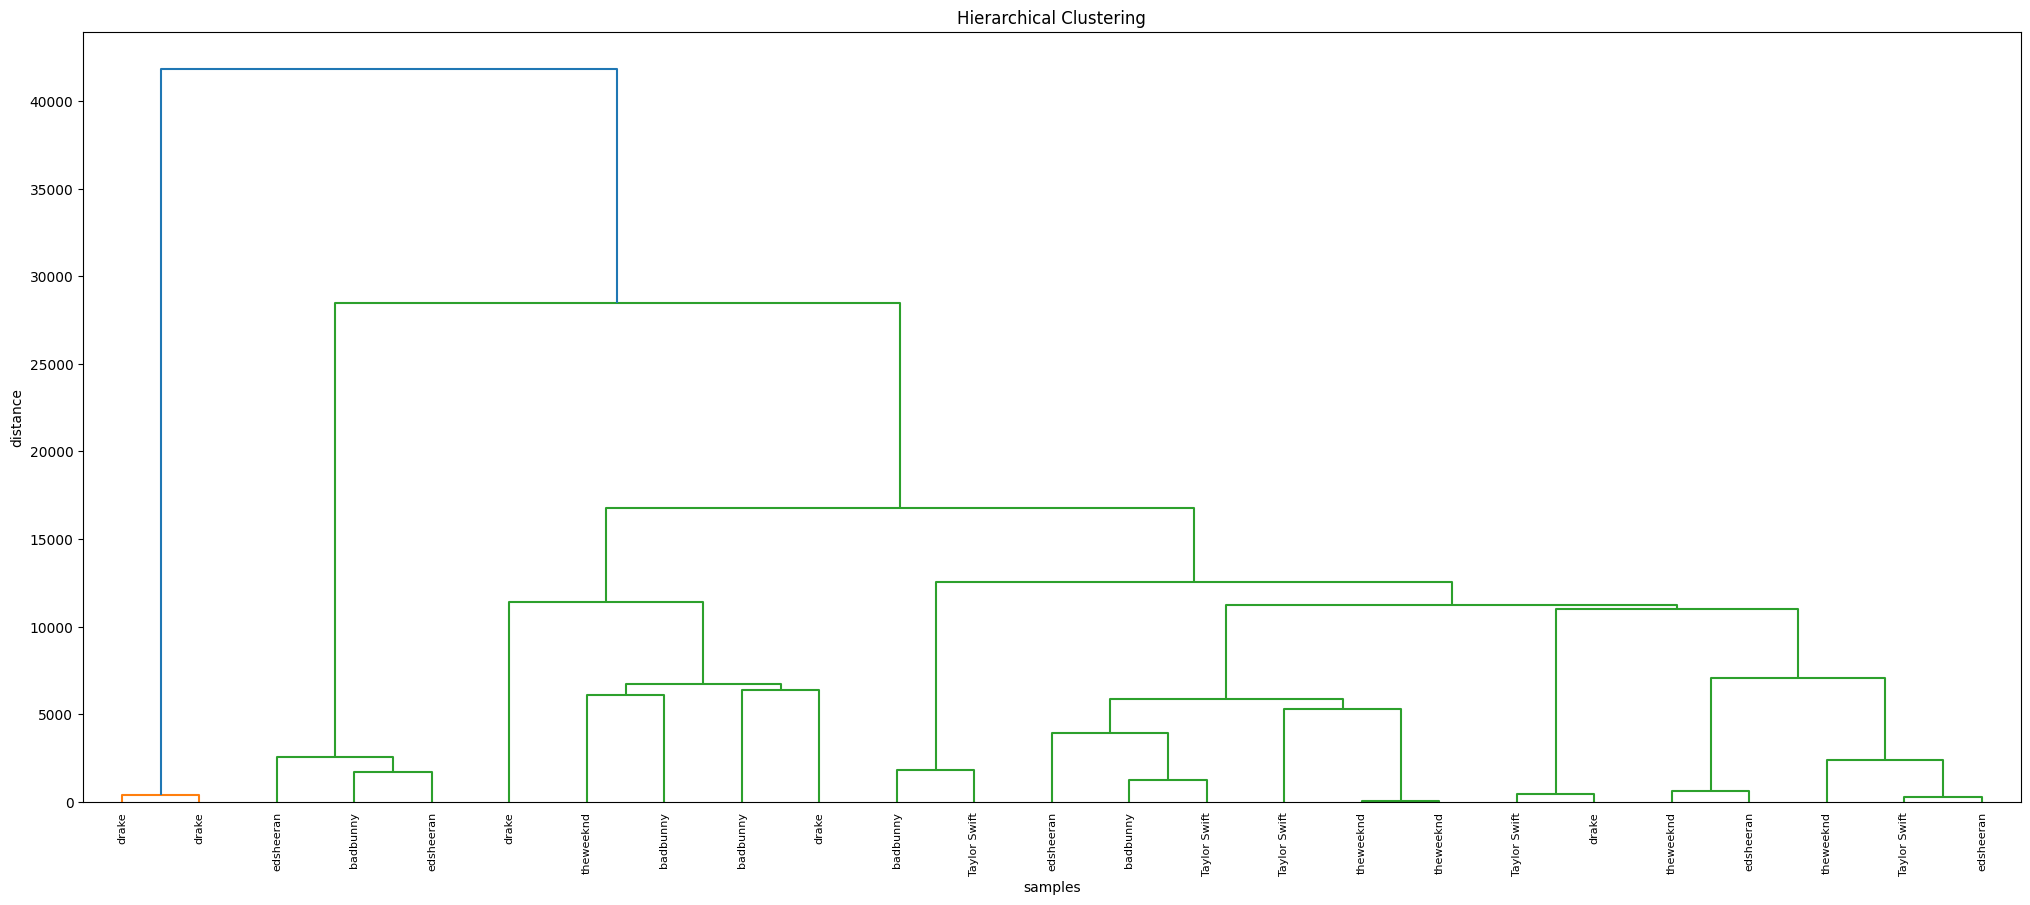

In [ ]:
draw_dendogram(Z, ticks)  

In [ ]:
weeknd_sample = df.loc[df['artist'] == 'theweeknd'].sample(n=1)
taylor_sample = df.loc[df['artist'] == 'Taylor Swift'].sample(n=1)
ed_sample = df.loc[df['artist'] == 'edsheeran'].sample(n=1)
badbunny_sample = df.loc[df['artist'] == 'badbunny'].sample(n=1)
drake_sample = df.loc[df['artist'] == 'drake'].sample(n=1)

frames = [weeknd_sample, taylor_sample, ed_sample, badbunny_sample, drake_sample]
result = pd.concat(frames)

In [ ]:
sample_data = result.iloc[:,4:].to_numpy()
y_true = result['artist'].to_numpy()
len(sample_data)

5

In [ ]:
new_df = result
for key in replace_dict:
    new_df = new_df.replace(key,replace_dict[key])

new_df = new_df.drop(['release_date'], axis = 1)
ARTIST_DATA = new_df.to_numpy()

In [ ]:
pca = PCA(2)
data = ARTIST_DATA[:,3:]
#Transform the data
data_pca = pca.fit_transform(data)
len(data_pca)

5

In [ ]:
# linkage is the the function that performs the clustering
Z = linkage(sample_data, 
            method='single', 
            metric='euclidean')

In [ ]:
# create string labels for the data samples, to show in the dendrogram
ticks = [f"{el}" for i, el in enumerate(y_true)]
len(ticks)

5

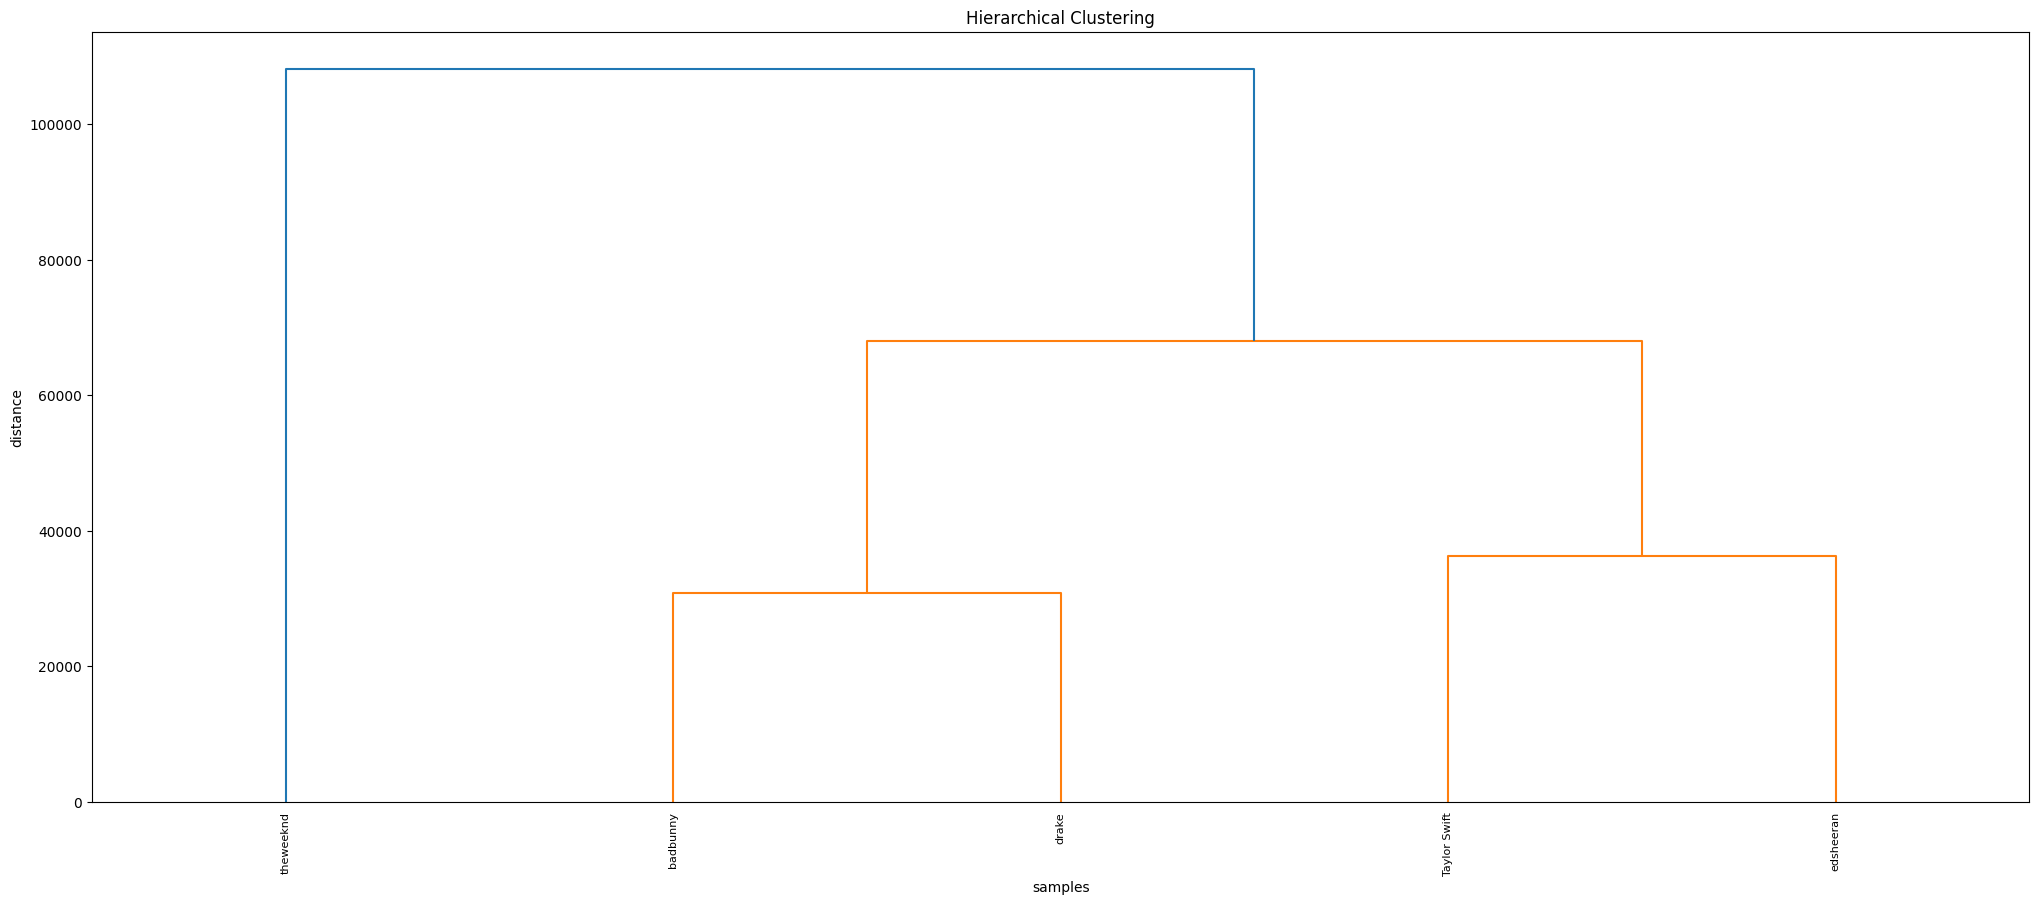

In [ ]:
draw_dendogram(Z, ticks)  

## Research Question 1: How can we build a model to predict the popularity of a song on Spotify, given the song’s audio and other features? 

In [ ]:
import numpy as np
from sklearn import tree  # Using sklearn Decision Tree classifier
from sklearn import ensemble  # Using sklearn Random Forest classifier
from sklearn.model_selection import train_test_split  # Using train_test_split to generate training and test data
np.random.seed(42)

In [ ]:
import pandas as pd #import csv data
data = pd.read_csv('songs.csv')

In [ ]:
artists=pd.get_dummies(data['artist'])

In [ ]:
data = data.drop(columns = ['Unnamed: 0','name','album','artist','release_date'])
data = data.join(artists)
data
# ADD DUMMY VARIABLE FOR ARTIST
# VECTORIZE THE NAME

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,Taylor Swift,badbunny,drake,edsheeran,theweeknd
0,239360,88,0.561,0.05030,0.520,0.000002,0.3550,-9.342,0.2440,0.424,153.150,0,0,1,0,0
1,170502,87,0.908,0.01270,0.546,0.000000,0.0707,-10.491,0.3230,0.225,131.016,0,0,1,0,0
2,261544,86,0.841,0.02010,0.358,0.000000,0.3900,-8.368,0.5910,0.329,158.014,0,0,1,0,0
3,152962,84,0.849,0.04070,0.433,0.000000,0.3880,-8.434,0.3160,0.395,142.110,0,0,1,0,0
4,160821,84,0.934,0.00274,0.614,0.000000,0.1230,-7.384,0.1980,0.616,144.045,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,277591,74,0.660,0.16200,0.817,0.000000,0.0667,-6.269,0.0521,0.714,135.942,1,0,0,0,0
468,244236,65,0.609,0.84900,0.373,0.000000,0.0779,-8.819,0.0263,0.130,106.007,1,0,0,0,0
469,189495,67,0.588,0.22500,0.608,0.000000,0.0920,-7.062,0.0365,0.508,90.201,1,0,0,0,0
470,208608,66,0.563,0.51400,0.473,0.000012,0.1090,-11.548,0.0503,0.405,101.934,1,0,0,0,0


In [ ]:
#Separate features columns from popularity column
#df1 = df.loc[:, df.columns != col]
x = data.loc[: , data.columns!='popularity']
y = data['popularity']
X = x.values.tolist()
y = y.values.tolist()

In [ ]:
# Use 70% of data for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.50, test_size=0.50)

## Method 1 - Decision Trees

In [ ]:
# Training classifier
clf = ensemble.RandomForestClassifier()  # Create decision tree classifier
clf.fit(X_train, y_train)  # Train the classifier

RandomForestClassifier()

In [ ]:
print('Predictions made by our decision tree classifier on the test data:')
pred=clf.predict(X_test)
print(clf.predict(X_test))
print()
print('Known classes for the test data:')
print(y_test)

Predictions made by our decision tree classifier on the test data:
[51 64 67 65 59 68 59 64 53 62 73 49 66 47 67 82 48 67 62 65 65 33 60 82
 37 88 48 65 64 60 38 81 66 63 56 38 47 60 41 47 41 62 86 55 65 83 63 85
 62 64 66 60 34 88 47 66 82  0 60 64 55 36 81 49 34 66 43 39 59 55 67]

Known classes for the test data:
[47, 63, 88, 70, 60, 67, 58, 67, 55, 65, 68, 45, 86, 50, 65, 69, 49, 71, 62, 39, 69, 33, 80, 75, 37, 92, 58, 77, 61, 64, 53, 76, 64, 68, 41, 41, 51, 76, 37, 46, 55, 53, 65, 40, 66, 67, 69, 84, 68, 61, 66, 60, 51, 66, 47, 49, 78, 0, 66, 51, 82, 55, 82, 38, 34, 64, 42, 52, 62, 76, 63]


In [ ]:
# Get the accuracy
print(clf.score(X_test, y_test))

0.11267605633802817


In [ ]:
from sklearn import metrics
# Get the root mean squared error
np.sqrt(metrics.mean_squared_error(y_test,pred))

10.47666757038142

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
preprocessing_scaler = scalar.fit(X_train)
X_train_scale = preprocessing_scaler.transform(X_train)
X_test_scale = preprocessing_scaler.transform(X_test)
X_val_scale = preprocessing_scaler.transform(X_val)

## Method 2 - K-Nearest-Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

def sklearn_knn_predict(trainX, trainy, testX, distance_metric, k):
    knn_model = KNeighborsClassifier(algorithm = 'brute',n_neighbors=k, metric=distance_metric)
    training_model = knn_model.fit(trainX, trainy)
    predicts = training_model.predict(testX)
    
    return predicts

In [ ]:
def knn_grid_search(trainX, trainy, validationX, validationy, distance_metric_list, n_neighbors_list):
    """For each metric in distance_metric_list, and each value k in n_neighbors_list,
    trains knn classifiers with those parameters
    on the training data and computes the accuracy on the validation data.
    Returns a dictionary mapping each value of the hyperparameter pair (metric, k)
    to the accuracy with those hyperparameters on the validation data
    """
    metric_dict = {}
    for m in distance_metric_list:
        for n in n_neighbors_list:
            predictions = sklearn_knn_predict(trainX, trainy, validationX, m, n)
            accuracy = accuracy_score(validationy, predictions)
            metric_dict[(m, n)] = accuracy
    return metric_dict

In [ ]:
metric, k = 'None', 0
validation_accuracy = 0.0

accuracy_dict = knn_grid_search(X_train_scale, y_train, X_val_scale, y_val, ["euclidean","manhattan"] ,[1,3,5,7,9,11,13,15,17,19])
minimum_key = min(accuracy_dict, key=accuracy_dict.get)
min_accuracy = round(accuracy_dict[minimum_key],3)

print('The best parameters are metric =', minimum_key[0], 'and k =', minimum_key[1], 'with', min_accuracy, 'accuracy on the validation data')
test_predict = sklearn_knn_predict(X_train_scale, y_train, X_test_scale, minimum_key[0], minimum_key[1])
test_accuracy = round(accuracy_score(y_test, test_predict), 3)
print('Test accuracy:', test_accuracy)

The best parameters are metric = manhattan and k = 1 with 0.014 accuracy on the validation data
Test accuracy: 0.085


In [ ]:
#create a new KNN model
knn_cv = KNeighborsClassifier(metric="manhattan", n_neighbors=17)
#train model with cv of 5
cv_scores = cross_val_score(knn_cv, X_train_scale, y_train, cv=5)
#print each cv score (accuracy) and average them
print("KNN cv_scores mean:{}".format(np.mean(cv_scores)))

KNN cv_scores mean:0.06363636363636363


C:\Users\hawai\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

for i in range(1, 9):
    poly = PolynomialFeatures(i)
    poly.fit(X_train)
    
    train_transformed = poly.transform(X_train_scale)
    val_transformed = poly.transform(X_val_scale)
    
    knn_cv = KNeighborsClassifier(metric="manhattan", n_neighbors=17)
    knn_cv.fit(train_transformed, y_train) # Learn hypothesis, i.e., find w_0 and w_1 for best fitting line

    y_pred = knn_cv.predict(val_transformed)

    print(accuracy_score(y_val, y_pred))
# 8 had the highest

0.04225352112676056
0.056338028169014086
0.056338028169014086
0.04225352112676056
0.028169014084507043
0.028169014084507043
0.056338028169014086
0.07042253521126761


In [ ]:
#create a new KNN model
knn_cv = KNeighborsClassifier()
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train_scale, y_train, cv=5)
#print each cv score (accuracy) and average them
print("KNN cv_scores mean:{}".format(np.mean(cv_scores)))

KNN cv_scores mean:0.048484848484848485


C:\Users\hawai\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
knn_cv = KNeighborsClassifier()
knn_cv.fit(X_train_scale,y_train)
pred=knn_cv.predict(X_test_scale)

# Get the accuracy score 
score=knn_cv.score(X_test_scale,y_test)
print(score)

0.09859154929577464


In [ ]:
# Get the root mean squared error
np.sqrt(metrics.mean_squared_error(y_test,pred))

12.674694762555177

## Method 3 - Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

mlp=MLPClassifier(hidden_layer_sizes=(100,100))#.fit(X_train,y_train)
mlp.fit(X_train_scale,y_train)

pred= mlp.predict(X_test_scale)
print(accuracy_score(y_test,pred))

0.07042253521126761


C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

for i in range(1, 9):
    poly = PolynomialFeatures(i)
    poly.fit(X_train)
    
    train_transformed = poly.transform(X_train_scale)
    val_transformed = poly.transform(X_val_scale)
    
    clf = MLPClassifier(hidden_layer_sizes=(100,100))
    clf.fit(train_transformed, y_train)

    y_pred = clf.predict(val_transformed)

    print(accuracy_score(y_val, y_pred))

C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.014084507042253521


C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.04225352112676056
0.014084507042253521
0.014084507042253521
0.028169014084507043
0.014084507042253521
0.056338028169014086
0.04225352112676056


## Method 4 - Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

reg = LinearRegression()  # Create LinearRegression instance
reg.fit(X_train_scale, y_train)

#print('The learned hypothesis has the weights ' + str(reg.coef_))
print('Regression score on test data:\t' + str(reg.score(X_test_scale, y_test)))

Regression score on test data:	0.44239917508802395


## Research Question 2: Can we accurately predict the artist of a song based on songs' audio features?

## Method 1 - Decision Trees

In [ ]:
import numpy as np
from sklearn import tree  # Using sklearn Decision Tree classifier
from sklearn import ensemble  # Using sklearn Random Forest classifier
from sklearn.model_selection import train_test_split  # Using train_test_split to generate training and test data
np.random.seed(42) 

In [ ]:
import pandas as pd #import csv data
data = pd.read_csv('songs.csv')

In [ ]:
#drop columns that are irrelevant to our research question
data = data.drop(columns = ['Unnamed: 0', 'album', 'name', 'release_date'])
data

,artist,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,drake,239360,88,0.561,0.05030,0.520,0.000002,0.3550,-9.342,0.2440,0.424,153.150
1,drake,170502,87,0.908,0.01270,0.546,0.000000,0.0707,-10.491,0.3230,0.225,131.016
2,drake,261544,86,0.841,0.02010,0.358,0.000000,0.3900,-8.368,0.5910,0.329,158.014
3,drake,152962,84,0.849,0.04070,0.433,0.000000,0.3880,-8.434,0.3160,0.395,142.110
4,drake,160821,84,0.934,0.00274,0.614,0.000000,0.1230,-7.384,0.1980,0.616,144.045
...,...,...,...,...,...,...,...,...,...,...,...,...
467,Taylor Swift,277591,74,0.660,0.16200,0.817,0.000000,0.0667,-6.269,0.0521,0.714,135.942
468,Taylor Swift,244236,65,0.609,0.84900,0.373,0.000000,0.0779,-8.819,0.0263,0.130,106.007
469,Taylor Swift,189495,67,0.588,0.22500,0.608,0.000000,0.0920,-7.062,0.0365,0.508,90.201
470,Taylor Swift,208608,66,0.563,0.51400,0.473,0.000012,0.1090,-11.548,0.0503,0.405,101.934


In [ ]:
#Separate features columns from artist column
x = data.iloc[: , 1:]
y = data.iloc[:, :1]
X = x.values.tolist()
y = y.values.tolist()

In [ ]:
# Use 70% of data for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.50, test_size=0.50)

In [ ]:
# Training classifier
clf = ensemble.RandomForestClassifier()  # Create decision tree classifier
clf.fit(X_train, y_train)  # Train the classifier

C:\Users\hawai\AppData\Local\Temp\ipykernel_12128\3881901882.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)  # Train the classifier


RandomForestClassifier()

In [ ]:
print('Predictions made by our decision tree classifier on the test data:')
print(clf.predict(X_test))
y_pred = clf.predict(X_test)
print()
print('Known classes for the test data:')
print(y_test)

Predictions made by our decision tree classifier on the test data:
['edsheeran' 'Taylor Swift' 'drake' 'Taylor Swift' 'Taylor Swift'
 'badbunny' 'Taylor Swift' 'Taylor Swift' 'Taylor Swift' 'Taylor Swift'
 'drake' 'Taylor Swift' 'badbunny' 'Taylor Swift' 'Taylor Swift' 'drake'
 'theweeknd' 'Taylor Swift' 'Taylor Swift' 'edsheeran' 'Taylor Swift'
 'theweeknd' 'badbunny' 'Taylor Swift' 'theweeknd' 'badbunny'
 'Taylor Swift' 'Taylor Swift' 'Taylor Swift' 'Taylor Swift' 'theweeknd'
 'drake' 'Taylor Swift' 'Taylor Swift' 'edsheeran' 'theweeknd'
 'Taylor Swift' 'badbunny' 'theweeknd' 'theweeknd' 'Taylor Swift'
 'edsheeran' 'badbunny' 'edsheeran' 'Taylor Swift' 'edsheeran'
 'Taylor Swift' 'badbunny' 'drake' 'Taylor Swift' 'Taylor Swift'
 'Taylor Swift' 'theweeknd' 'Taylor Swift' 'theweeknd' 'Taylor Swift'
 'edsheeran' 'edsheeran' 'Taylor Swift' 'drake' 'drake' 'theweeknd'
 'Taylor Swift' 'edsheeran' 'theweeknd' 'Taylor Swift' 'theweeknd'
 'edsheeran' 'Taylor Swift' 'drake' 'Taylor Swift']

Kn

In [ ]:
print(clf.score(X_test, y_test))

0.704225352112676


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_val, y_pred, average=None)

(array([0.32352941, 0.        , 0.25      , 0.3       , 0.16666667]),
 array([0.42307692, 0.        , 0.11764706, 0.33333333, 0.18181818]),
 array([0.36666667, 0.        , 0.16      , 0.31578947, 0.17391304]),
 array([26,  8, 17,  9, 11], dtype=int64))

## Method 2 - K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

def sklearn_knn_predict(trainX, trainy, testX, distance_metric, k):
    knn_model = KNeighborsClassifier(algorithm = 'brute',n_neighbors=k, metric=distance_metric)
    training_model = knn_model.fit(trainX, trainy)
    predicts = training_model.predict(testX)
    
    return predicts

In [ ]:
def knn_grid_search(trainX, trainy, validationX, validationy, distance_metric_list, n_neighbors_list):
    """For each metric in distance_metric_list, and each value k in n_neighbors_list,
    trains knn classifiers with those parameters
    on the training data and computes the accuracy on the validation data.
    Returns a dictionary mapping each value of the hyperparameter pair (metric, k)
    to the accuracy with those hyperparameters on the validation data
    """
    metric_dict = {}
    for m in distance_metric_list:
        for n in n_neighbors_list:
            predictions = sklearn_knn_predict(trainX, trainy, validationX, m, n)
            accuracy = accuracy_score(validationy, predictions)
            metric_dict[(m, n)] = accuracy
    return metric_dict

In [ ]:
metric, k = 'None', 0
validation_accuracy = 0.0

accuracy_dict = knn_grid_search(X_train_scale, y_train, X_val_scale, y_val, ["euclidean","manhattan"] ,[1,3,5,7,9,11,13,15,17,19])
minimum_key = min(accuracy_dict, key=accuracy_dict.get)
min_accuracy = round(accuracy_dict[minimum_key],3)

print('The best parameters are metric =', minimum_key[0], 'and k =', minimum_key[1], 'with', min_accuracy, 'accuracy on the validation data')
test_predict = sklearn_knn_predict(X_train_scale, y_train, X_test_scale, minimum_key[0], minimum_key[1])
test_accuracy = round(accuracy_score(y_test, test_predict), 3)
print('Test accuracy:', test_accuracy)


C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

The best parameters are metric = euclidean and k = 1 with 0.986 accuracy on the validation data
Test accuracy: 1.0


C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [ ]:
precision_recall_fscore_support(y_val, test_predict, average=None)

(array([0.28571429, 0.        , 0.27777778, 0.25      , 0.15384615]),
 array([0.30769231, 0.        , 0.29411765, 0.22222222, 0.18181818]),
 array([0.2962963 , 0.        , 0.28571429, 0.23529412, 0.16666667]),
 array([26,  8, 17,  9, 11], dtype=int64))

In [ ]:
#create a new KNN model
knn_cv = KNeighborsClassifier(metric="manhattan", n_neighbors=17)
#train model with cv of 5
cv_scores = cross_val_score(knn_cv, X_train_scale, y_train, cv=5)
#print each cv score (accuracy) and average them
print("KNN cv_scores mean:{}".format(np.mean(cv_scores)))

KNN cv_scores mean:1.0


C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

for i in range(1, 9):
    poly = PolynomialFeatures(i)
    poly.fit(X_train)
    
    train_transformed = poly.transform(X_train_scale)
    val_transformed = poly.transform(X_val_scale)
    
    knn_cv = KNeighborsClassifier(metric="manhattan", n_neighbors=17)
    knn_cv.fit(train_transformed, y_train) # Learn hypothesis, i.e., find w_0 and w_1 for best fitting line

    y_pred = knn_cv.predict(val_transformed)

    print(accuracy_score(y_val, y_pred))

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
preprocessing_scaler = scalar.fit(X_train)
X_train_scale = preprocessing_scaler.transform(X_train)
X_test_scale = preprocessing_scaler.transform(X_test)
X_val_scale = preprocessing_scaler.transform(X_val)

## Method 3 - Support Vector Machines


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

clf = svm.SVC()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(accuracy_score(y_test, predicted)) #calculate accuracy

print(precision_recall_fscore_support(y_test, predicted, average=None))

0.39436619718309857
(array([0.4057971, 0.       , 0.       , 0.       , 0.       ]), array([1., 0., 0., 0., 0.]), array([0.57731959, 0.        , 0.        , 0.        , 0.        ]), array([28,  4, 18,  8, 13], dtype=int64))


C:\Users\hawai\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hawai\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for i in range(1, 9):
    poly = PolynomialFeatures(i)
    poly.fit(X_train)
    
    train_transformed = poly.transform(X_train_scale)
    val_transformed = poly.transform(X_val_scale)
    
    clf = svm.SVC()
    clf.fit(train_transformed, y_train)

    y_pred = clf.predict(val_transformed)

    print(accuracy_score(y_val, y_pred))

C:\Users\hawai\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hawai\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hawai\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hawai\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

0.6619718309859155
0.5774647887323944
0.38028169014084506
0.36619718309859156


C:\Users\hawai\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.36619718309859156


C:\Users\hawai\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.36619718309859156


C:\Users\hawai\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.36619718309859156


C:\Users\hawai\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.36619718309859156


## Method 4 - Neural Networks


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(100,100))
clf.fit(X_train_scale, y_train)
predicted = clf.predict(X_test_scale)
print(accuracy_score(y_test, predicted)) #calculate accuracy
print(precision_recall_fscore_support(y_test, predicted, average=None))

C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.676056338028169
(array([0.6969697 , 0.16666667, 1.        , 0.54545455, 0.76923077]), array([0.82142857, 0.25      , 0.44444444, 0.75      , 0.76923077]), array([0.75409836, 0.2       , 0.61538462, 0.63157895, 0.76923077]), array([28,  4, 18,  8, 13], dtype=int64))


C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
for i in range(1, 9):
    poly = PolynomialFeatures(i)
    poly.fit(X_train)
    
    train_transformed = poly.transform(X_train_scale)
    val_transformed = poly.transform(X_val_scale)
    
    clf = MLPClassifier(hidden_layer_sizes=(100,100))
    clf.fit(train_transformed, y_train)

    y_pred = clf.predict(val_transformed)
    
    print(i)
    print(accuracy_score(y_val, y_pred))

C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1
0.6901408450704225


C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2
0.6619718309859155
3
0.6901408450704225


C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4
0.647887323943662


C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5
0.647887323943662


C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6
0.6901408450704225


C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


7
0.6338028169014085


C:\Users\hawai\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


8
0.676056338028169
